In [497]:
import pandas as pd
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

In [498]:
user_info = pd.read_csv('user_info.csv', sep=';')

In [617]:
user_info.reset_index().to_csv('try')

In [615]:
user_info.to_csv('count_users.csv')

!!!
В табличке, user_info нет данных о некоторых пользователях, информация о которых есть в таблице с событиями пользователями. Мы берем для предсказания вероятности только те, которые были изначально и для которых мы знаем дату заключения контрактов.
!!!

In [499]:
user_info[user_info.user_id==84518]

,education_group_id,user_id,contract_date,churn,churn_date,outer_communication_source


In [500]:
user_info['contract_date']=user_info['contract_date'].astype('datetime64')

In [501]:
user_info['churn_date']=user_info['churn_date'].astype('datetime64')

In [502]:
user_info['today'] = pd.Timestamp("today")

In [503]:
user_info['today']

0      2023-02-18 01:32:07.326069
1      2023-02-18 01:32:07.326069
2      2023-02-18 01:32:07.326069
3      2023-02-18 01:32:07.326069
4      2023-02-18 01:32:07.326069
                  ...            
1206   2023-02-18 01:32:07.326069
1207   2023-02-18 01:32:07.326069
1208   2023-02-18 01:32:07.326069
1209   2023-02-18 01:32:07.326069
1210   2023-02-18 01:32:07.326069
Name: today, Length: 1211, dtype: datetime64[ns]

In [504]:
user_info['minus'] = user_info['today']  - user_info['contract_date']
user_info['minus'] = user_info['minus'].dt.days

In [505]:
user_info['churn_d']=(user_info['churn_date']  - user_info['contract_date']).dt.days

In [506]:
user_info['churn_d']=user_info['churn_d'].fillna(user_info['minus'])

In [507]:
user_info.drop(['contract_date', 'churn_date', 'today', 'minus'], axis=1, inplace=True)

In [508]:
user_info["outer_communication_source"]=user_info["outer_communication_source"].astype(int)

In [509]:
user_info["churn"]=user_info["churn"].astype(int)

In [510]:
df1 = user_info.groupby('user_id').education_group_id.count().to_frame(name='Count_groups')
df2 = user_info.groupby('user_id').churn.sum().to_frame(name='Leave')
df3 = user_info.groupby('user_id').outer_communication_source.sum().to_frame()
df4 = user_info.groupby('user_id').churn_d.max().to_frame()

In [511]:
df3[df3['outer_communication_source']>1]=1

In [512]:
user_info = df1.join(df2).join(df3).join(df4)

In [513]:
import numpy as np
user_info['Total_leave']=np.where(user_info['Count_groups']==user_info['Leave'], 1, 0)

In [514]:
user_info

,Count_groups,Leave,outer_communication_source,churn_d,Total_leave
user_id,,,,,
194244,2,0,0,375.0,0
194613,1,1,1,532.0,1
264269,1,0,1,509.0,0
318014,1,0,0,410.0,0
326238,2,0,1,381.0,0
...,...,...,...,...,...
11031388,1,0,0,370.0,0
11037721,1,0,0,369.0,0
11039139,1,0,1,368.0,0


In [515]:
user_events = pd.read_csv('user_events.csv', sep=';')
one_hot = pd.get_dummies(user_events['event_type_id'])
user_events = user_events.join(one_hot)

In [516]:
events = user_events.groupby('user_id')[[6,7,8,9,10, 11, 12, 13, 14, 15, 18, 19, 20, 22, 23, 24, 25]].sum()

In [517]:
events

,6,7,8,9,10,11,12,13,14,15,18,19,20,22,23,24,25
user_id,,,,,,,,,,,,,,,,,
84518,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
84946,93.0,61.0,0.0,0.0,118.0,119.0,44.0,42.0,45.0,13.0,4.0,1.0,1.0,17.0,11.0,10.0,5.0
89049,0.0,0.0,0.0,0.0,3.0,4.0,4.0,4.0,1.0,0.0,0.0,0.0,0.0,2.0,1.0,2.0,1.0
118192,182.0,162.0,0.0,0.0,7.0,6.0,0.0,0.0,8.0,0.0,2.0,1.0,0.0,1.0,0.0,0.0,0.0
118266,186.0,137.0,0.0,0.0,22.0,22.0,1.0,4.0,10.0,1.0,11.0,6.0,7.0,4.0,1.0,4.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11019781,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11023486,0.0,0.0,0.0,0.0,36.0,35.0,21.0,18.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11026039,7.0,12.0,0.0,0.0,81.0,79.0,58.0,57.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [518]:
users = user_info.join(events, how='left')

In [519]:
users = users.fillna(0)

In [520]:
users.head()

,Count_groups,Leave,outer_communication_source,churn_d,Total_leave,6,7,8,9,10,...,13,14,15,18,19,20,22,23,24,25
user_id,,,,,,,,,,,,,,,,,,,,,
194244,2,0,0,375.0,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
194613,1,1,1,532.0,1,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
264269,1,0,1,509.0,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
318014,1,0,0,410.0,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
326238,2,0,1,381.0,0,0.0,0.0,0.0,0.0,22.0,...,22.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [521]:
student_test_result = pd.read_csv('student_test_result.csv', sep=';')
st = student_test_result.groupby('student_id', as_index=False).attempts_count.mean()
st = st.rename(columns={'student_id':'user_id', 'attempts_count':'mean_attempts_count'})
st = st.set_index('user_id')

In [522]:
users = users.join(st, how='left')

In [523]:
users = users.fillna(users['mean_attempts_count'].mean())

In [524]:
education_test = pd.read_csv('education_test.csv', sep=';')

In [525]:
student_test_result = pd.read_csv('student_test_result.csv', sep=';')

In [526]:
student_test_result = student_test_result.rename(columns={'education_test_id' : 'id'})

In [527]:
homeworks = education_test.merge(student_test_result, how='inner')

In [528]:
percent_by_user = homeworks.groupby(['student_id'], as_index=False) \
    .agg({'percent' : 'mean', 'spent_time' : 'mean'}) \
    .rename(columns={'student_id' : 'user_id', 'percent' : 'percent_mean', 'spent_time' : 'spent_time_mean'}) \
    .round()

In [529]:
percent_by_user = percent_by_user.set_index('user_id')

In [530]:
users = users.join(percent_by_user, how='left')

In [531]:
users['percent_mean']=users['percent_mean'].fillna(users['percent_mean'].median())

In [532]:
users['spent_time_mean']=users['spent_time_mean'].fillna(users['spent_time_mean'].median())

In [533]:
X = users.drop(['Leave', 'Total_leave'], axis=1)
y = users['Total_leave']

In [534]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=33)

In [567]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

pipe_lr = Pipeline([('scaler', MinMaxScaler()),
                 ('LR', LogisticRegression(penalty='l2'))])

In [568]:
### Обучаем модели на трейне
pipe_lr.fit(X_train, y_train)
round(pipe_lr.score(X_test, y_test),3)

0.779

0.661

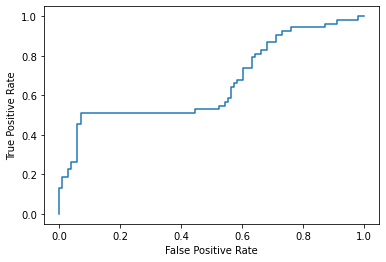

In [569]:
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import auc 
# Получим всевозможные пары fpr, tpr
fpr, tpr, thresholds = roc_curve(y_test, pipe_lr.predict_proba(X_test)[:, 1])
# И нарисуем ROC-кривую
RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
# Посчитаем ROC-AUC
round(auc(fpr, tpr),3)

In [582]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pipe_lr.predict(X_test)))

              precision    recall  f1-score   support

           0       0.78      0.93      0.85       101
           1       0.79      0.49      0.60        53

    accuracy                           0.78       154
   macro avg       0.78      0.71      0.73       154
weighted avg       0.78      0.78      0.76       154



In [599]:
from sklearn.metrics import classification_report
print(classification_report(y, pipe_lr.predict(X)))

              precision    recall  f1-score   support

           0       0.83      0.96      0.89       554
           1       0.82      0.51      0.63       215

    accuracy                           0.83       769
   macro avg       0.83      0.73      0.76       769
weighted avg       0.83      0.83      0.82       769



In [583]:
from imblearn.under_sampling import NearMiss
nm = NearMiss()
X_train_miss, Y_train_miss = nm.fit_resample(X_train, y_train.ravel())

print('После применения метода кол-во меток со значением True: {}'.format(sum(Y_train_miss == True)))
print('После применения метода кол-во меток со значением False: {}'.format(sum(Y_train_miss == False)))

После применения метода кол-во меток со значением True: 162
После применения метода кол-во меток со значением False: 162


In [589]:
lregress2 = LogisticRegression(penalty='l2', max_iter=5000)
lregress2.fit(X_train_miss, Y_train_miss.ravel())
prediction = lregress2.predict(X_test)
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.68      0.49      0.57       101
           1       0.37      0.57      0.44        53

    accuracy                           0.51       154
   macro avg       0.52      0.53      0.51       154
weighted avg       0.57      0.51      0.52       154



In [590]:
prediction = lregress2.predict(X)
print(classification_report(y, prediction))

              precision    recall  f1-score   support

           0       0.79      0.53      0.64       554
           1       0.35      0.65      0.45       215

    accuracy                           0.56       769
   macro avg       0.57      0.59      0.54       769
weighted avg       0.67      0.56      0.59       769



In [593]:
from imblearn.under_sampling import NearMiss
nm = NearMiss()
X_train_miss, Y_train_miss = nm.fit_resample(X, y.ravel())

print('После применения метода кол-во меток со значением True: {}'.format(sum(Y_train_miss == True)))
print('После применения метода кол-во меток со значением False: {}'.format(sum(Y_train_miss == False)))

После применения метода кол-во меток со значением True: 215
После применения метода кол-во меток со значением False: 215


In [594]:
lregress2 = LogisticRegression(penalty='l2', max_iter=5000)
lregress2.fit(X_train_miss, Y_train_miss.ravel())
prediction = lregress2.predict(X)
print(classification_report(y, prediction))

              precision    recall  f1-score   support

           0       0.79      0.52      0.63       554
           1       0.34      0.64      0.45       215

    accuracy                           0.56       769
   macro avg       0.57      0.58      0.54       769
weighted avg       0.66      0.56      0.58       769



После анализа, вернемся все же к первому варианту, так как он оказался все же наиболее предпочтительным и значительного повышения метрик примененными методами уменьшения дисбаланса классов достигнуть не удалось.
Предсказываем вероятности ухода для каждого клиента нашего датасета:

In [604]:
X.columns

Index([              'Count_groups', 'outer_communication_source',
                          'churn_d',                            6,
                                  7,                            8,
                                  9,                           10,
                                 11,                           12,
                                 13,                           14,
                                 15,                           18,
                                 19,                           20,
                                 22,                           23,
                                 24,                           25,
              'mean_attempts_count',               'percent_mean',
                  'spent_time_mean'],
      dtype='object')

In [606]:
Probability = X.drop(X.columns, axis=1)

In [607]:
Probability['proba'] = lregress2.predict_proba(X)[:,1]

In [610]:
Probability = Probability.reset_index()

In [613]:
Probability.head(10)

,user_id,proba
0,194244,0.639757
1,194613,0.453251
2,264269,0.301242
3,318014,0.406762
4,326238,0.799526
5,328703,0.366105
6,332087,0.208797
7,365103,0.271898
8,371092,0.388846
9,392111,0.341764
